## Unsupervised Machine Learning (Clustering)

### United States Hate Crimes (1991-2018)

#### This script contains the following:

1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

### 1. Importing libraries and data and renaming columns 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#defining path

path = '/Users/Ana/Documents/Hate Crimes in the US'

In [4]:
path

'/Users/Ana/Documents/Hate Crimes in the US'

In [6]:
# Import data
df = pd.read_csv(os.path.join(path, 'Prepared dataset', 'hate_crimes_wrangled_3.csv'))

In [7]:
df.shape

(153656, 11)

In [8]:
df.head()

Unnamed: 0  incident_year state_abbr state_name region_name  \
0           0           1991         AZ    Arizona        West   
1           1           1991         AZ    Arizona        West   
2           2           1991         AZ    Arizona        West   
3           3           1991         AZ    Arizona        West   
4           4           1991         AZ    Arizona        West   

   offender_count offender_race  victim_count        offense_type  \
0               0       Unknown             1        Intimidation   
1               1       Unknown             1        Intimidation   
2               1       Unknown             1        Intimidation   
3               1         White             1  Aggravated Assault   
4               1       Unknown             1        Intimidation   

   total_individual_victims                       prejudice  
0                       1.0  Anti-Black or African American  
1                       1.0                     Anti-Jewish  
2                       1.0                       Anti-Arab  
3                       1.0  Anti-Black or African American  
4                       1.0  Anti-Black or African American

In [9]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'state_abbr', 'state_name', 'region_name', 'offender_race', 'offense_type', 'prejudice'],axis = 1)

In [10]:
df.head()

incident_year  offender_count  victim_count  total_individual_victims
0           1991               0             1                       1.0
1           1991               1             1                       1.0
2           1991               1             1                       1.0
3           1991               1             1                       1.0
4           1991               1             1                       1.0

### 2. Elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anamariatiscareno/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

In [13]:
score

[-9651306.031852013,
 -2976466.5487351357,
 -1678752.1437458745,
 -1188353.439491051,
 -973173.620721003,
 -842351.4793832856,
 -734941.3595637125,
 -660205.0756292273,
 -618596.1967529532]

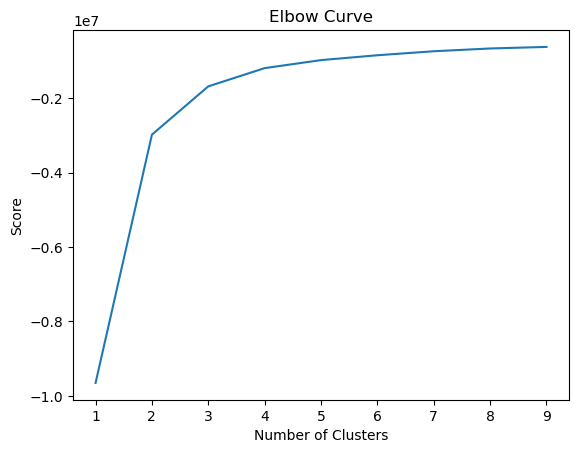

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the graph above, we can see that there is a large jump from 2 to 3 on the x-axis and a smaller jump from 3 to 4, and then the curve just straightens out. That means that the optimal count for your clusters is 4.

### 3. K-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init = 1) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4, n_init=1)

In [17]:
df['clusters'] = kmeans.fit_predict(df)

In [18]:
df.head()

incident_year  offender_count  victim_count  total_individual_victims  \
0           1991               0             1                       1.0   
1           1991               1             1                       1.0   
2           1991               1             1                       1.0   
3           1991               1             1                       1.0   
4           1991               1             1                       1.0   

   clusters  
0         3  
1         3  
2         3  
3         3  
4         3

In [19]:
df['clusters'].value_counts()

clusters
1    42278
0    40851
2    38850
3    31677
Name: count, dtype: int64

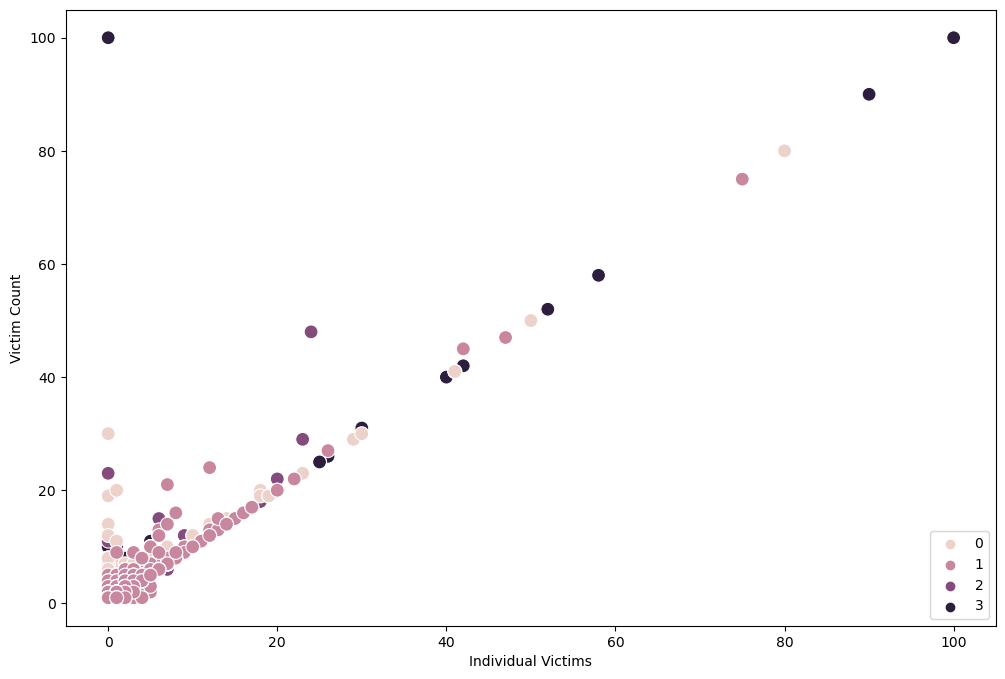

In [20]:
# Plot the clusters for the "Individual Victims" and "Victim Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_individual_victims'], y=df['victim_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Individual Victims') # Label x-axis.
plt.ylabel('Victim Count') # Label y-axis.
plt.show()

The plot shows a positive relationship between the individual victim and victim count. This confirms the hypothesis that as the count of individual victims increase the victim count increases.

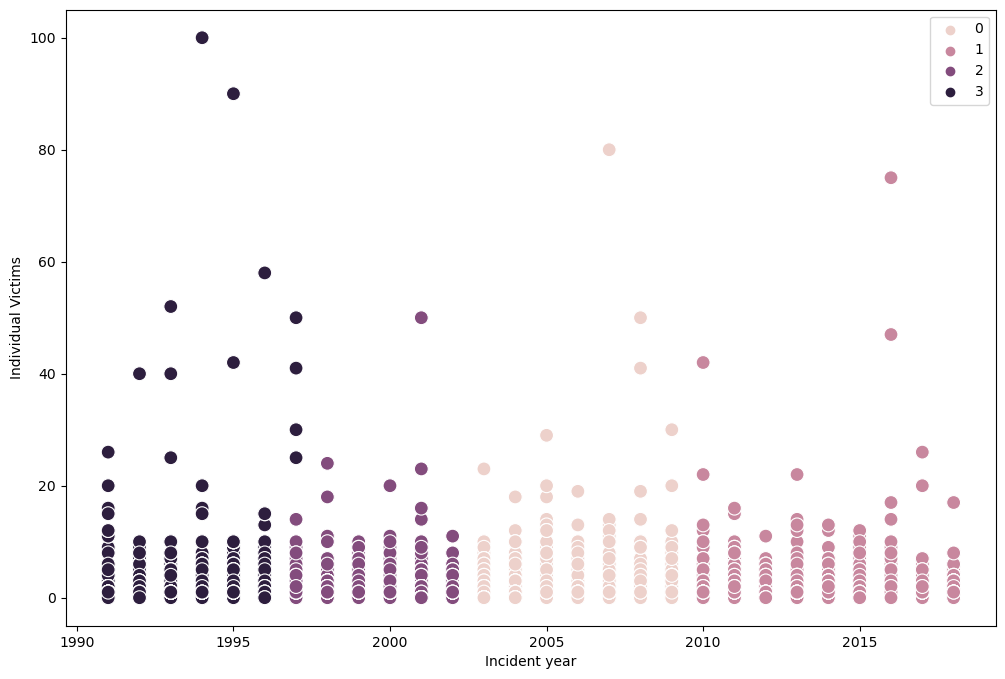

In [21]:
# Plot the clusters for the "Incident year" and "Individual Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['incident_year'], y=df['total_individual_victims'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Incident year') 
plt.ylabel('Individual Victims') 
plt.show()

This plot also makes sense as it is giving a frequency of victims for each year.

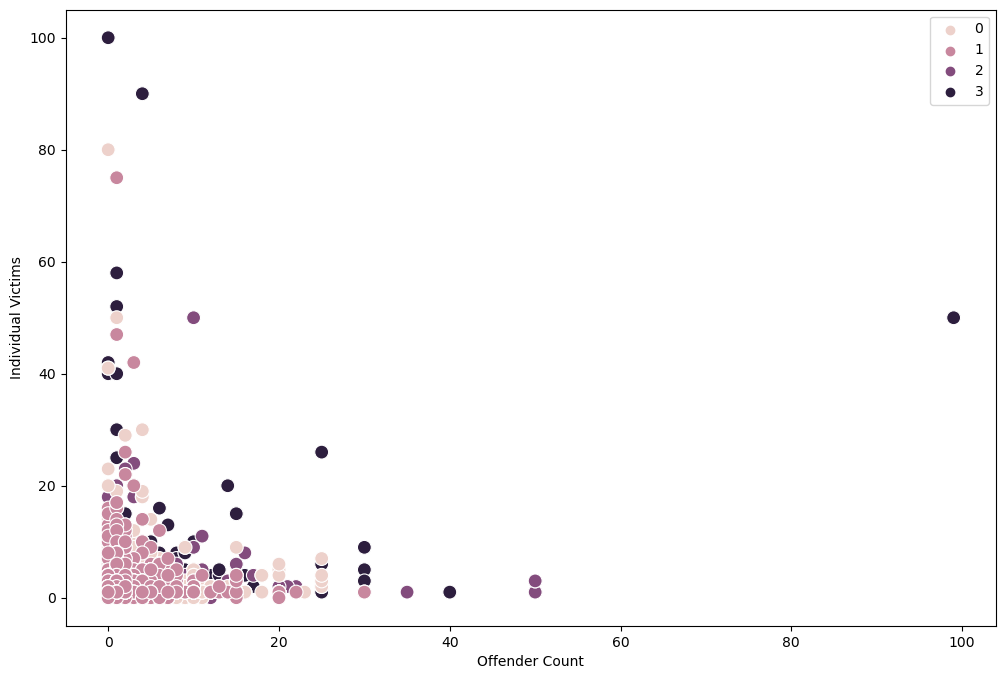

In [22]:
# Plot the clusters for the "Offender Count" and "Individual Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['offender_count'], y=df['total_individual_victims'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Offender Count') 
plt.ylabel('Individual Victims') 
plt.show()

This plot shows no relationship between the individual victims and the offender count . That means there is no correlation between the offender count and the individual victims.

In [23]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
df.groupby('clusters').agg({'offender_count':['mean', 'median'], 
                         'victim_count':['mean', 'median'], 
                         'total_individual_victims':['mean', 'median']})

offender_count        victim_count        total_individual_victims  \
                   mean median         mean median                     mean   
clusters                                                                      
0              0.921030    1.0     1.247387    1.0                 0.924188   
1              0.912129    1.0     1.227258    1.0                 1.027053   
2              0.943810    1.0     1.231274    1.0                 0.949755   
3              0.956719    1.0     1.259210    1.0                 1.014490   

                 
         median  
clusters         
0           1.0  
1           1.0  
2           1.0  
3           1.0

The grouping of information shows that the meadian is 1 for each variable. In this case, showed that there is a median of at least 1 victim for an offender.

In [25]:
# exporting data 
df.to_csv(os.path.join(path, 'Prepared dataset', 'hate_crimes_wrangled_4.csv'))